ML STEPS:
1. The Problem
2. Data Collection
3. Data Cleaning
4. Data Selection
5. Pick a model
6. Train model
7. Test model
8. REPEAT

Getting started:
- Linear regression
- KNN (k-nearest-neighbours)
- SVM ()

https://www.youtube.com/watch?v=ujTCoH21GlA&list=PLzMcBGfZo4-mP7qA9cagf68V06sko5otr

In [ ]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import sklearn
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [ ]:
# Since our data is seperated by semicolons we need to do sep=";"
data = pd.read_csv('/content/drive/MyDrive/colab_data/ML/1/student-mat.csv', sep=';')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]

In [ ]:
# All data needs to be integer to use prediction
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   G1         395 non-null    int64
 1   G2         395 non-null    int64
 2   G3         395 non-null    int64
 3   studytime  395 non-null    int64
 4   failures   395 non-null    int64
 5   absences   395 non-null    int64
dtypes: int64(6)
memory usage: 18.6 KB


In [ ]:
predict = 'G3'

x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

<ipython-input-21-8f8bcdb649f1>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(data.drop([predict], 1))


In [ ]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

In [ ]:
# TRAIN MODEL MULTIPLE TIMES FOR BEST SCORE
best = 0
for _ in range(20):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))
    
    # If the current model has a better score than one we've already trained then save it
    if acc > best:
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)

Accuracy: 0.814785718154854
Accuracy: 0.766559401119066
Accuracy: 0.9325995128126761
Accuracy: 0.8300046030759101
Accuracy: 0.8540882957956673
Accuracy: 0.7599185023620457
Accuracy: 0.8724298504931861
Accuracy: 0.7329248181395633
Accuracy: 0.8016789401706983
Accuracy: 0.8766335333870559
Accuracy: 0.8992178645940061
Accuracy: 0.7564598120331963
Accuracy: 0.9504527844819486
Accuracy: 0.9238350290917811
Accuracy: 0.9077599033857696
Accuracy: 0.915161113463853
Accuracy: 0.8253029908866194
Accuracy: 0.9408767958092412
Accuracy: 0.7163276208809797
Accuracy: 0.8000032581927928


In [ ]:
# How to save a model into afile

with open('studentmodel.pickle', 'wb') as f:
  pickle.dump(linear, f)

# Loading model
pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)


In [ ]:
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

Coefficient: 
 [ 0.1476131   0.98026045 -0.22824473 -0.3231986   0.04746759]
Intercept: 
 -1.424604493305468


In [ ]:
predictions = linear.predict(x_test)

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

8.284071536915421 [10  9  3  0  2] 10
9.506880258551023 [11 10  3  0  4] 11
10.715385429422465 [11 11  2  0  4] 11
7.160080857572584 [ 8  8  4  0 10] 8
19.913940608414876 [18 19  1  0  6] 19
9.587511881674905 [10 10  2  0  4] 11
10.5615691553562 [13 10  2  1 22] 11
8.350399609275147 [8 9 1 0 0] 8
12.728584249017773 [12 13  2  0  2] 12
12.85147311790596 [10 13  1  0  6] 13
8.794166771859958 [ 8  8  1  0 30] 8
12.222999672722187 [12 12  2  0 12] 11
13.536860699841101 [14 13  1  0  8] 13
15.184622374648407 [16 15  2  0  0] 15
5.785757467197788 [7 7 2 1 2] 7
12.472385828881967 [14 13  4  0  0] 14
6.161633992667918 [8 7 2 0 0] 8
7.163663659672052 [ 9  7  2  0 18] 6
8.649508681703423 [9 9 2 0 8] 9
11.976568528417646 [12 12  1  0  2] 14
5.499343104776115 [7 6 1 0 5] 7
13.717937904337996 [12 14  3  0  7] 14
19.028615336567135 [18 18  1  0  8] 18
11.867983210293618 [15 12  3  0  0] 14
8.379006710803461 [10  9  3  0  4] 9
9.37192446990046 [11  9  1  1 19] 10
11.977450108964529 [10  9  2  0 75] 9

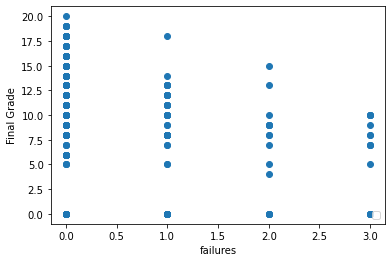

In [ ]:
# Drawing and plotting model
plot = "failures" # Change this to G1, G2, studytime or absences to see other graphs
plt.scatter(data[plot], data["G3"]) 
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()